In [11]:
# ------ Imports & data ------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
# df = pd.read_csv("data/raw/TMDB_movie_dataset_v11.csv")
df = pd.read_csv('data/processed/100k_subset.csv', usecols=['title', 'budget', 'revenue'])
df.dropna(inplace=True)
mask = (df['revenue'] == 0) & (df['budget'] == 0)
df = df.loc[~mask]
df = df.reset_index(drop=True)
print(df.size)

18300


In [12]:
# ------ Does Budget and Revenue correlate? ------
df.describe()

,revenue,budget
count,6.100000e+03,6.100000e+03
mean,9.955122e+06,3.923446e+06
std,7.496503e+07,1.970349e+07
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+02
50%,0.000000e+00,2.700000e+03
75%,1.282500e+02,1.500000e+05
max,2.930000e+09,5.000000e+08


In [13]:
# ------ Pearson Correlation Coefficient ------
print(df.corr(numeric_only=True))

          revenue    budget
revenue  1.000000  0.638756
budget   0.638756  1.000000


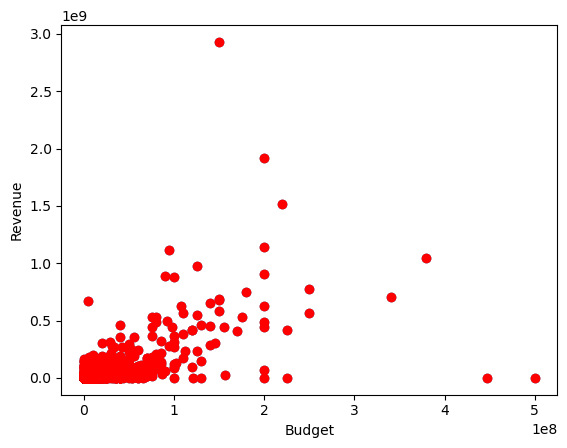

In [14]:
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.plot(df['budget'], df['revenue'], "ro")

## Interpretation: "Pearson Correlation Coefficient"
The correlation matrix shows, that there is a strong relationship
between budget and revenue. This suggests, that higher budgeted productions
generate more revenue at the box offices.

(It is obvious, that the quality of the data is lacking and therefor might
distort the values. There are data instances where production OR revenue is 0.00)

Training Metrics:
MAE: 8254604.28
RMSE: 47576305.95
R-squared: 0.4343

Test Metrics:
MAE: 11501306.99
RMSE: 88592362.72
R-squared: 0.3496


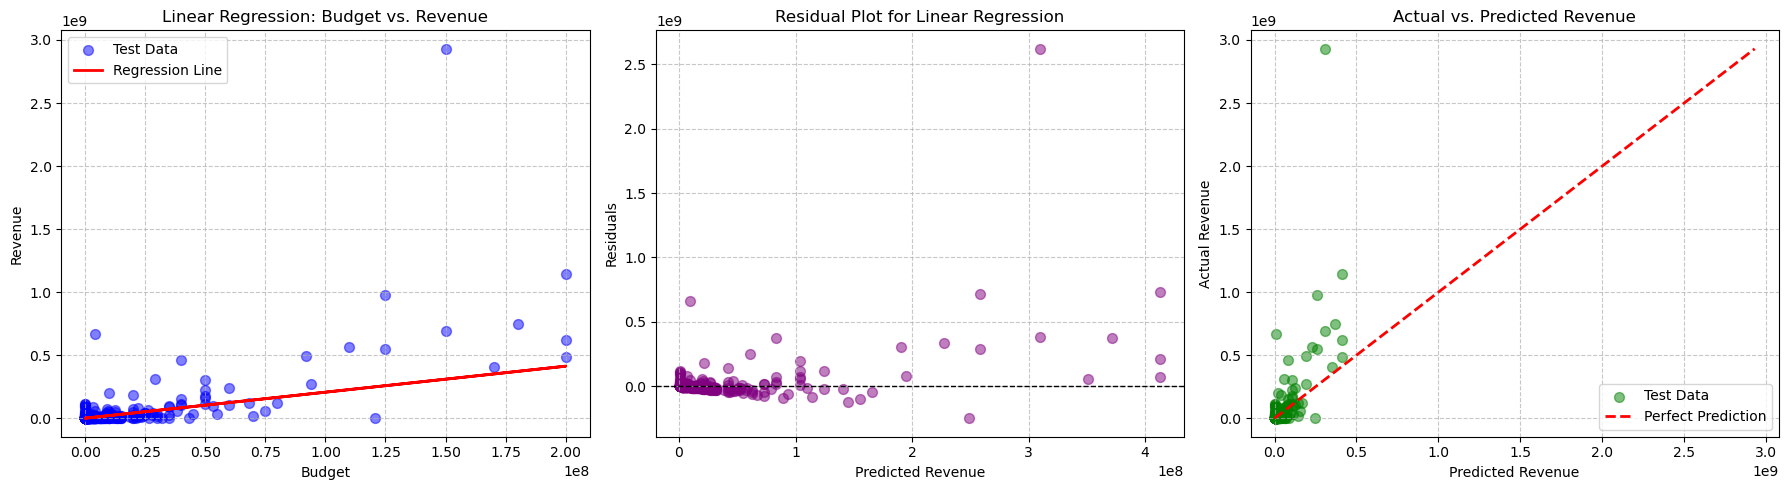

In [ ]:
# ------ Linear Regression ------

X = df[["budget"]]
y = df["revenue"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Metrics:")
print(f"MAE: {train_mae:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R-squared: {train_r2:.4f}")
print("\nTest Metrics:")
print(f"MAE: {test_mae:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R-squared: {test_r2:.4f}")
import matplotlib.pyplot as plt

# Setting up 3 plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Residuals aka Error
residuals = y_test - y_test_pred

# Get column names for labels
x_label = 'Budget'
y_label = 'Revenue'

# Plot 1: Scatter with Regression Line
axes[0].scatter(X_test, y_test, color='blue', alpha=0.5, s=50, label='Test Data')
axes[0].plot(X_test, y_test_pred, color='red', linewidth=2, label='Regression Line')
axes[0].set_xlabel(x_label)
axes[0].set_ylabel(y_label)
axes[0].set_title('Linear Regression: Budget vs. Revenue')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot 2: Residual Plot
axes[1].scatter(y_test_pred, residuals, color='purple', alpha=0.5, s=50)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].set_xlabel(f'Predicted {y_label}')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot for Linear Regression')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Plot 3: Actual vs. Predicted
axes[2].scatter(y_test_pred, y_test, color='green', alpha=0.5, s=50, label='Test Data')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
axes[2].set_xlabel(f'Predicted {y_label}')
axes[2].set_ylabel(f'Actual {y_label}')
axes[2].set_title('Actual vs. Predicted Revenue')
axes[2].legend()
axes[2].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Interpretation: Linear Regression Model: x=Budget y=Revenue
Even though I established that there is a strong correlation coefficient between
*budget* and *revenue*, a linear regression doesn't seem to be sufficient to capture
the overall relationship.
Looking at the R-squared value, which explains 
the proportion of the variance 
of a dependent variable (revenue)
explained by an independent variable (budget)
shows, that x explains only a small fraction of the variance within this linear model.

**Outliers**: Movies with revenue > $500M or budget > $100M films are highly 
impacting the regression and thus the evaluation of the error.
As of right now, I didnt implement a handling of outliers.
For further exploration this must be the first task to tackle.


Further exploration could be:
- [ ] Handling of outliers
- [ ] fitting polynomial functions onto the data
- [ ] 